# Visualization of inversion - Complex data

In [28]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from mpl_toolkits.axes_grid.inset_locator import inset_axes
from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

In [29]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [30]:
mypath = 'data/flightlines_grid_2100pts_100km2_-150m/tfa_inversion/'

In [31]:
results = []
with open(mypath+'inc65_dec-40_r500_int13_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int13_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int13_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))        
with open(mypath+'inc65_dec-40_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int6_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int6_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int6_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int10_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int10_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int10_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int10_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int13_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int13_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int13_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int7_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int6_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int7_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))

In [32]:
with open('data/model.pickle') as w:
        model = pickle.load(w)

In [33]:
verts_true = mfun.plot_prisms(model['prisms'])
results_verts = []
for r in results:
    results_verts.append(mfun.plot_prisms(r['prisms']))

In [34]:
xp = results[0]['x']
yp = results[0]['y']
zp = results[0]['z']

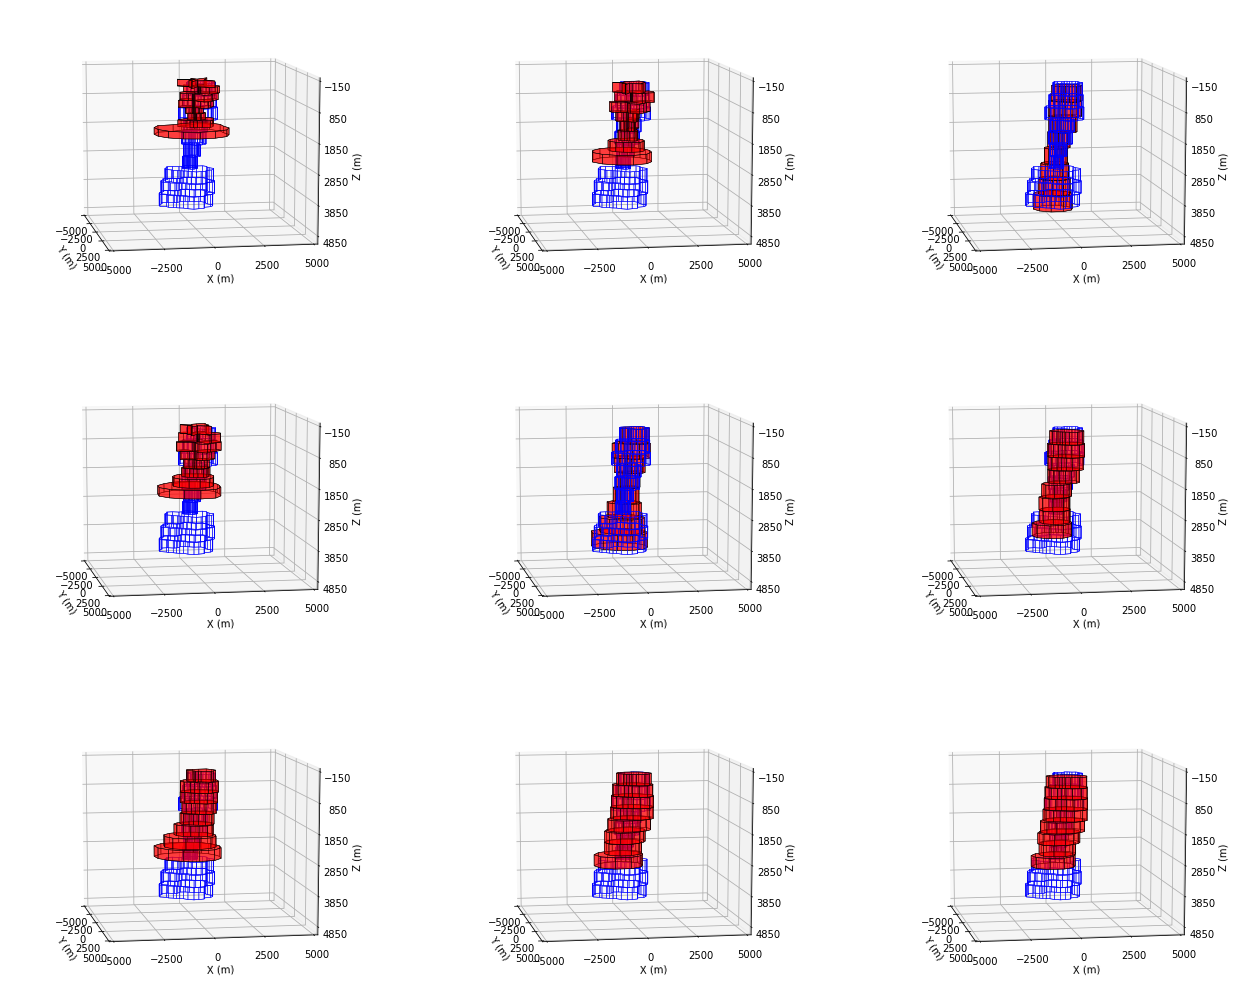

In [35]:
fig = plt.figure(figsize=(22,18))

#norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(results_verts[i], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(5000, -150, 100)
    ax.set_xlabel('Y (m)')
    ax.set_ylabel('X (m)')
    ax.set_zlabel('Z (m)')
    ax.view_init(10, -10)
    ax.set_xticks(np.linspace(-5000, 5000, 5))
    ax.set_yticks(np.linspace(-5000, 5000, 5))
    ax.set_zticks(np.linspace(4850, -150, 6))

    #ax.tricontourf(xp, yp, results[i]['residual'],
    #                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'complex_3d_estimates_topxint_true.png', dpi=300)
plt.show()

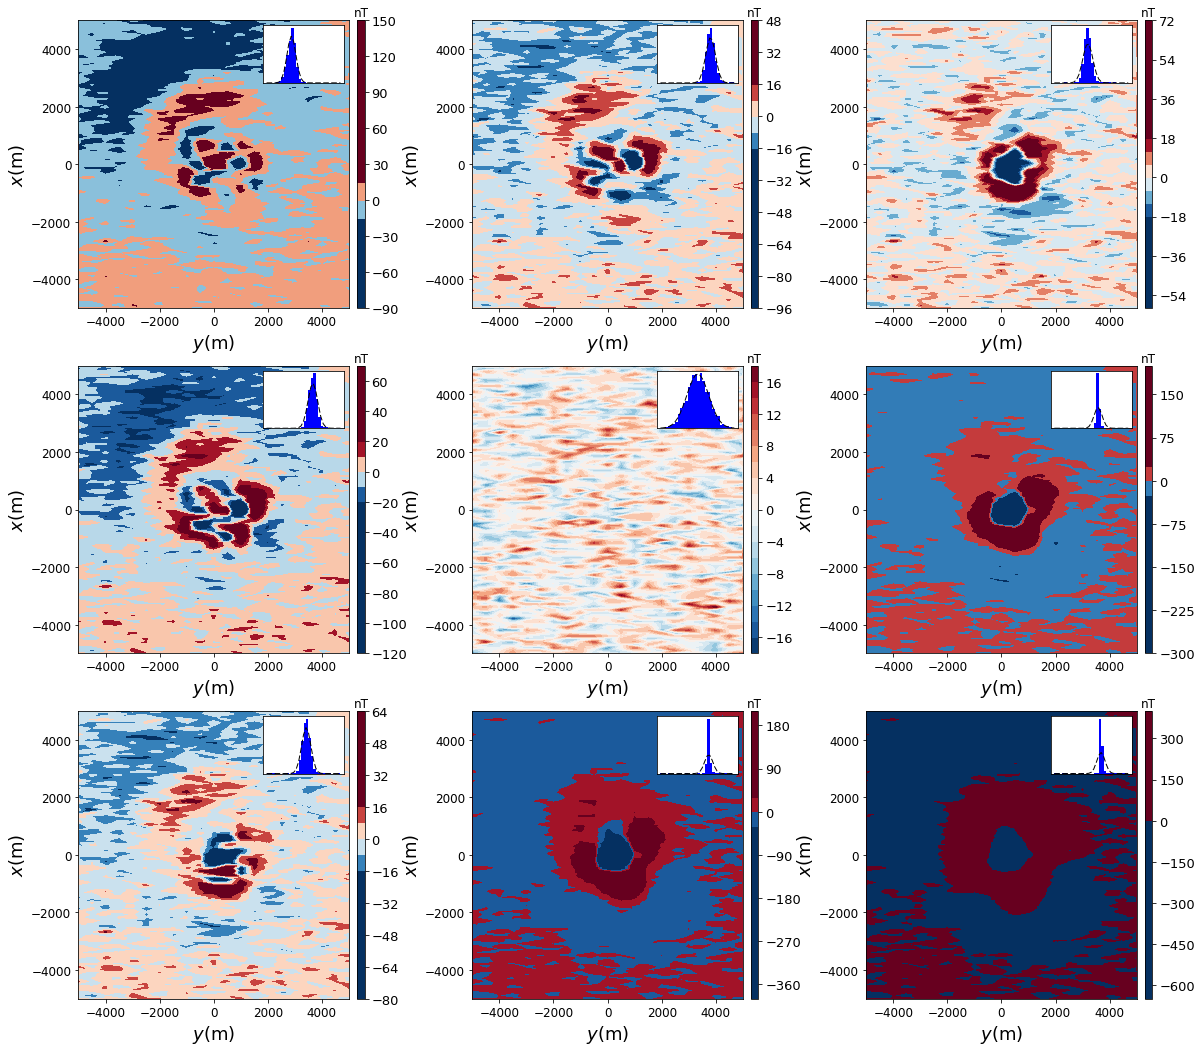

In [36]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(m)', fontsize=18)
    plt.xlabel('$y$(m)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i]['residual'])
    std = np.std(results[i]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    #plt.title('Probability')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'complex_3d_residual_topxint_true.png', dpi=300)
plt.show()

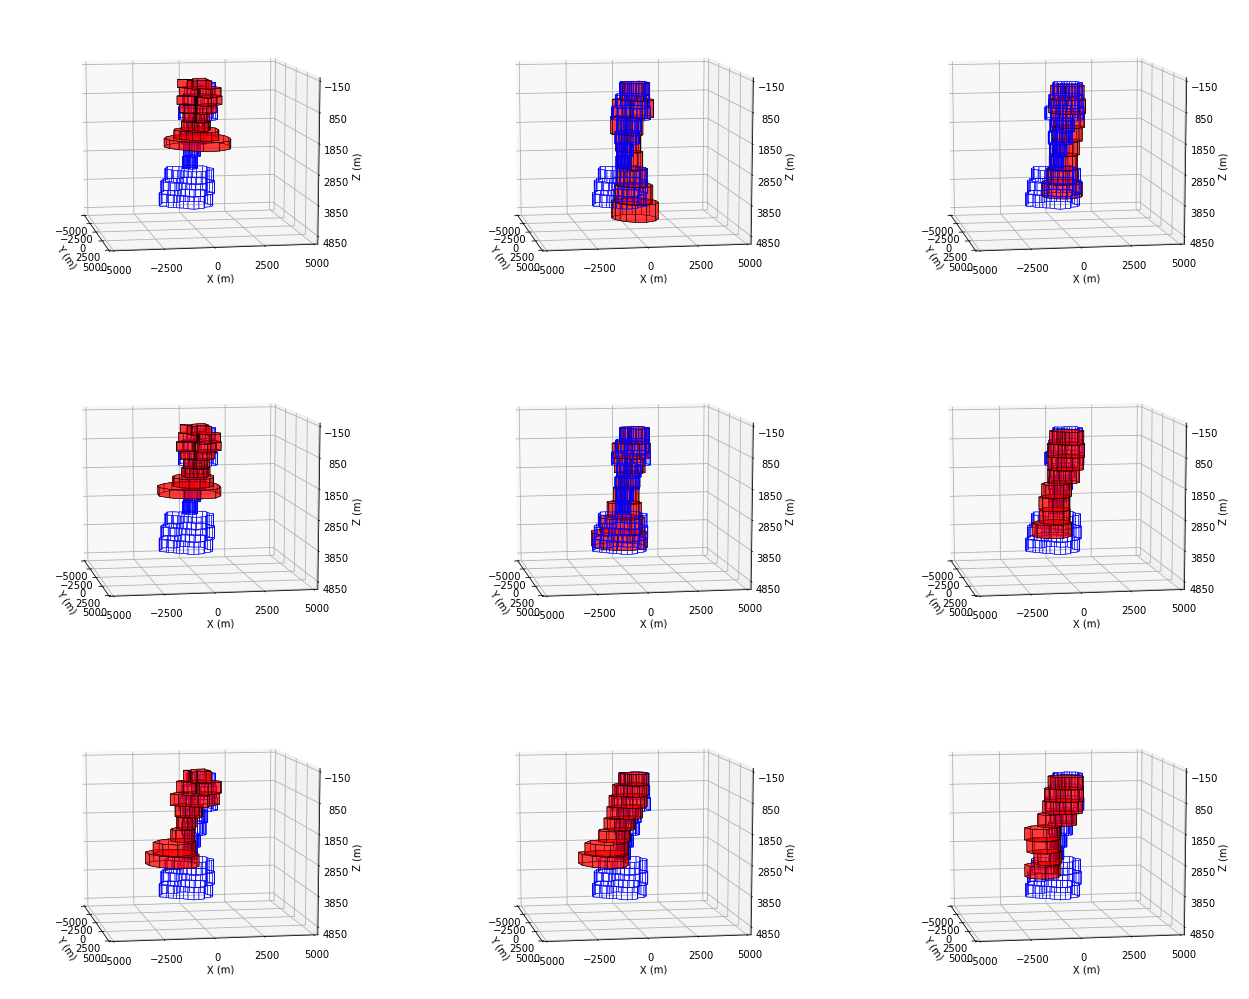

In [37]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(results_verts[i+9], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(5000, -150, 100)
    ax.set_xlabel('Y (m)')
    ax.set_ylabel('X (m)')
    ax.set_zlabel('Z (m)')
    ax.view_init(10, -10)
    ax.set_xticks(np.linspace(-5000, 5000, 5))
    ax.set_yticks(np.linspace(-5000, 5000, 5))
    ax.set_zticks(np.linspace(4850, -150, 6))

    #ax.tricontourf(xp, yp, results[i+9]['residual'],
    #                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'complex_3d_estimates_topxdir_true.png', dpi=300)
plt.show()

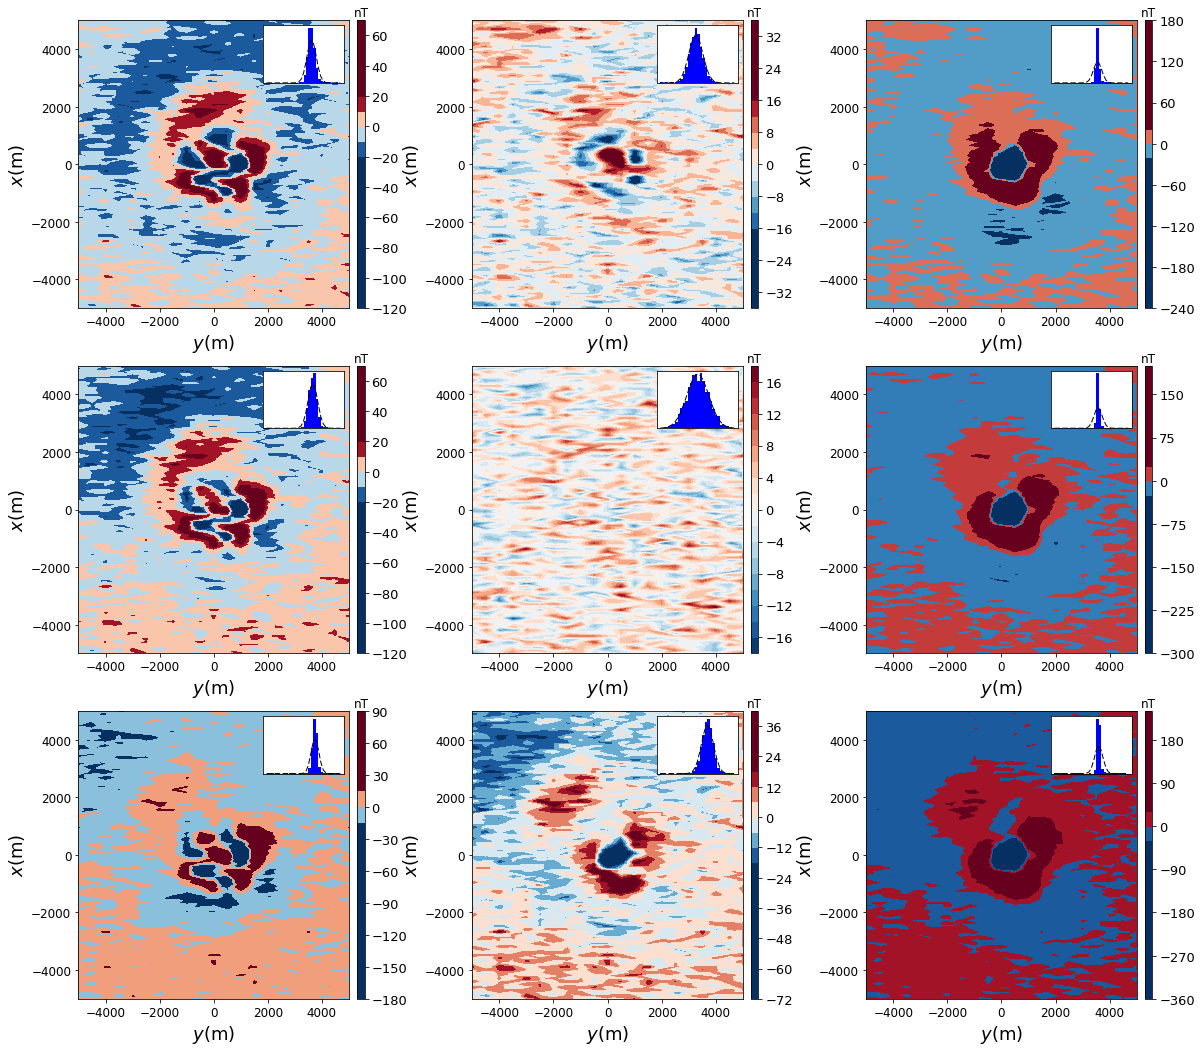

In [38]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i+9]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(m)', fontsize=18)
    plt.xlabel('$y$(m)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i+9]['residual'])
    std = np.std(results[i+9]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i+9]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'complex_3d_residual_topxdir_true.png', dpi=300)
plt.show()

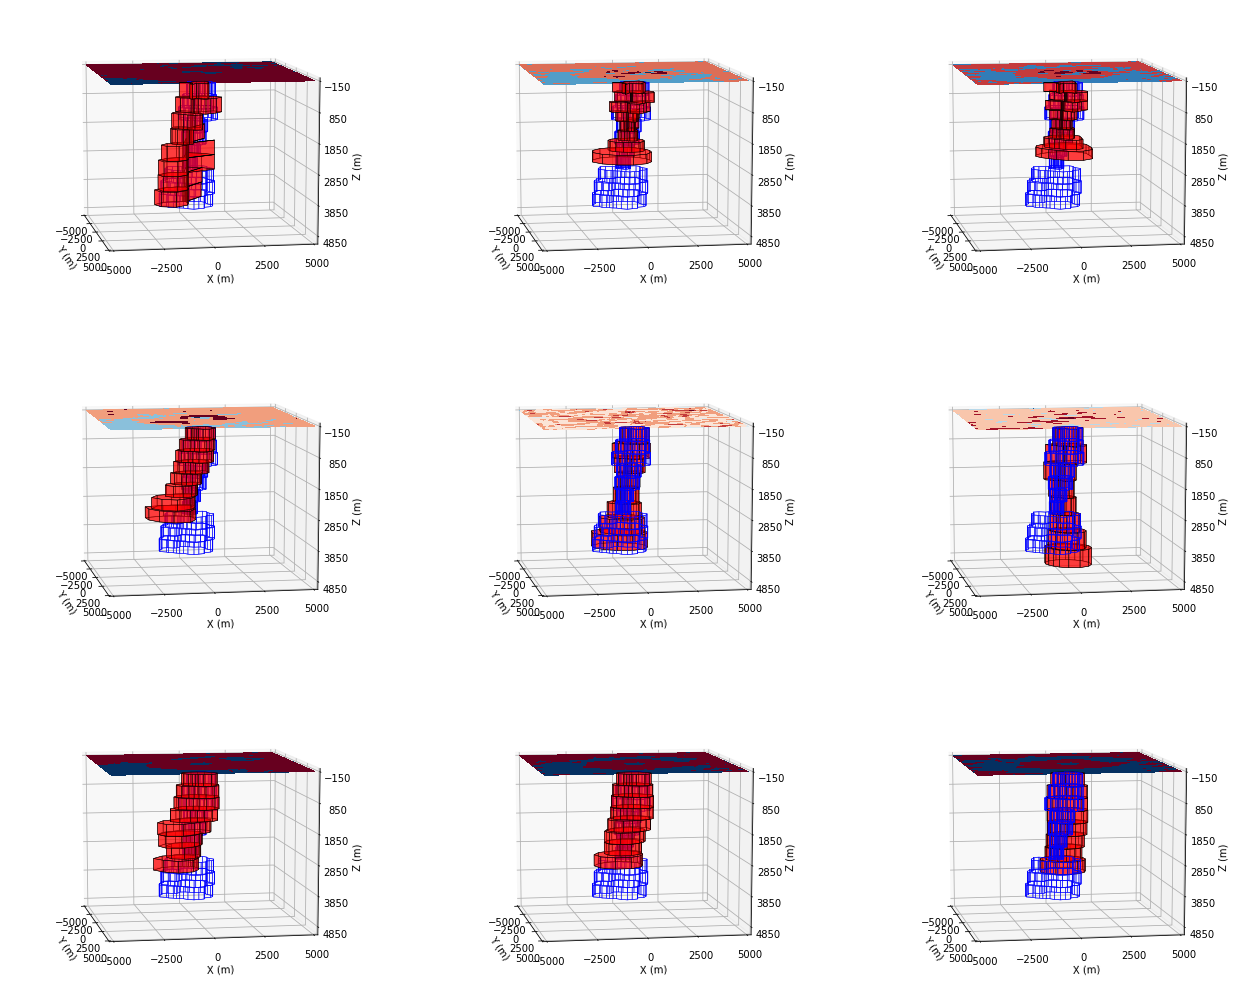

In [39]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(results_verts[i+18], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(5000, -150, 100)
    ax.set_xlabel('Y (m)')
    ax.set_ylabel('X (m)')
    ax.set_zlabel('Z (m)')
    ax.view_init(10, -10)
    ax.set_xticks(np.linspace(-5000, 5000, 5))
    ax.set_yticks(np.linspace(-5000, 5000, 5))
    ax.set_zticks(np.linspace(4850, -150, 6))

    ax.tricontourf(xp, yp, results[i+18]['residual'],
                    zdir='z', offset=-150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'complex_3d_estimates_dirxint_true.png', dpi=300)
plt.show()

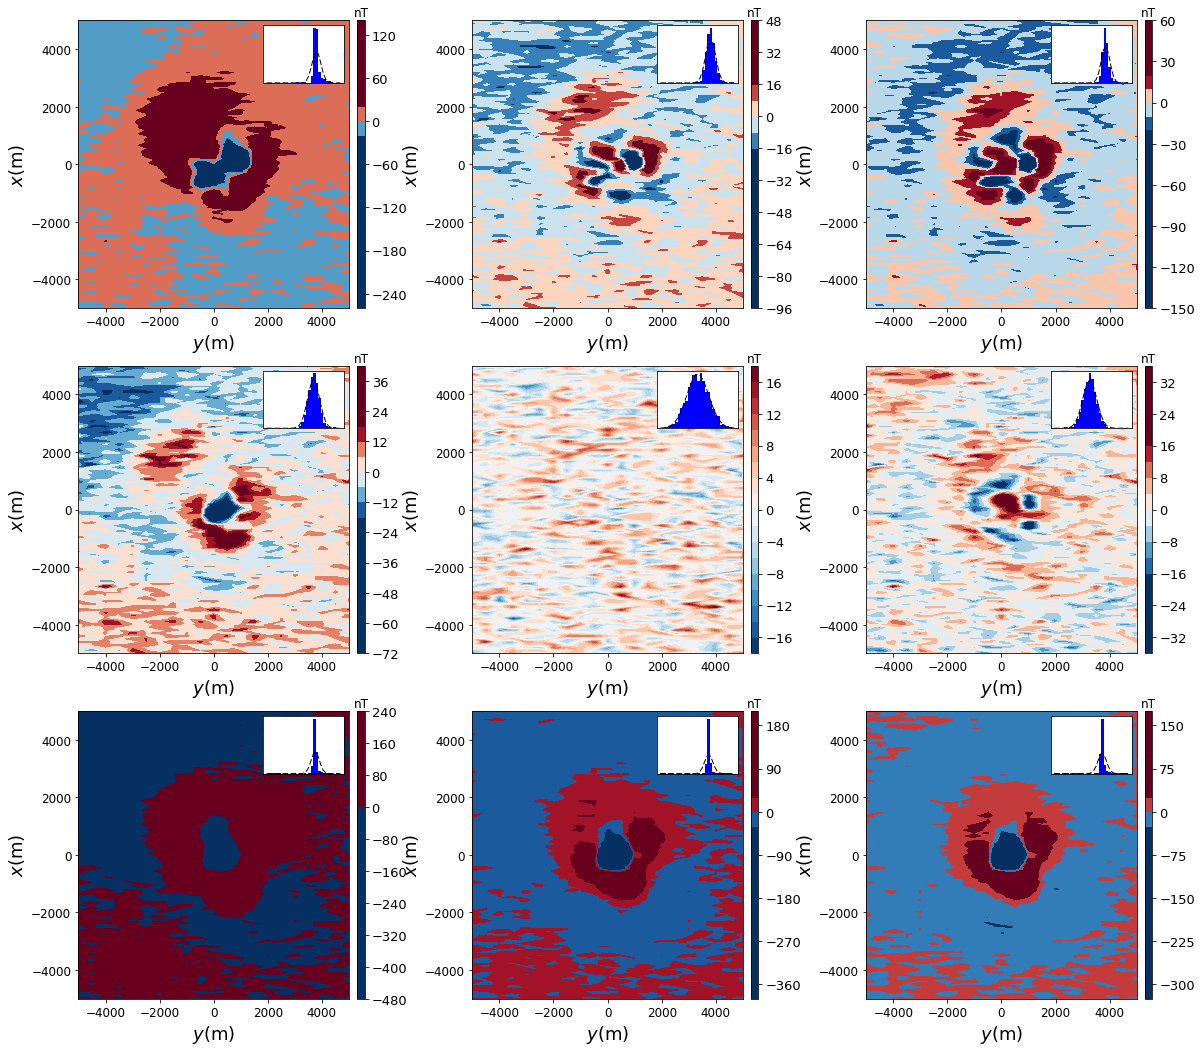

In [40]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i+18]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(m)', fontsize=18)
    plt.xlabel('$y$(m)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i+18]['residual'])
    std = np.std(results[i+18]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i+18]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'complex_3d_residual_dirxint_true.png', dpi=300)
plt.show()